
Missing values:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64


C:\Users\Азис\AppData\Local\Temp\ipykernel_24860\580669751.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='Date', y='Weekly_Sales', ci=None)


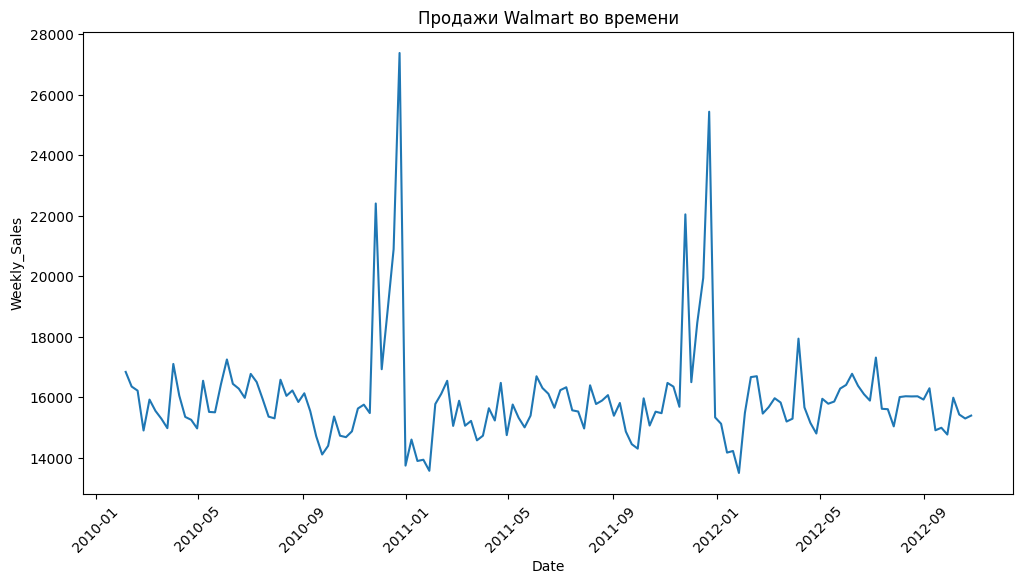

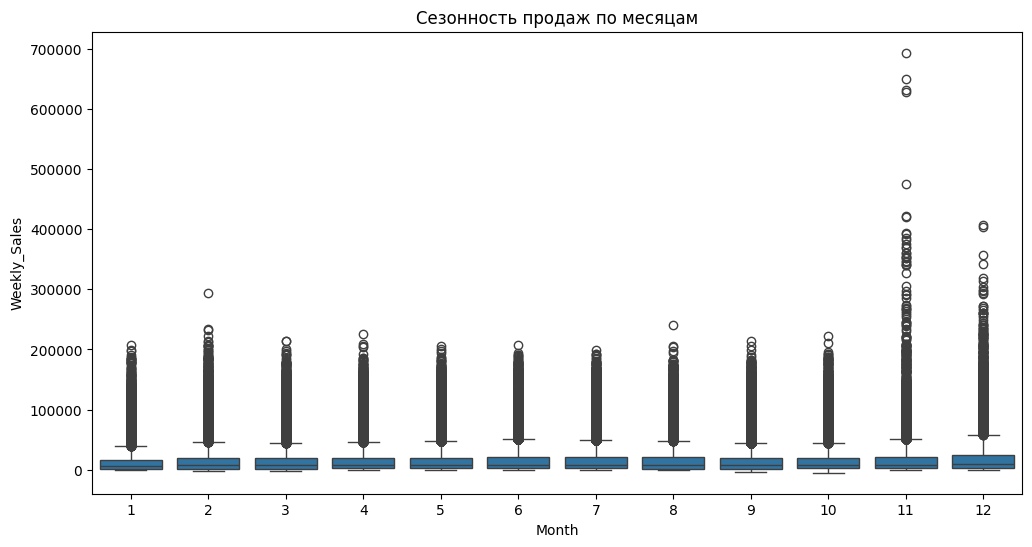

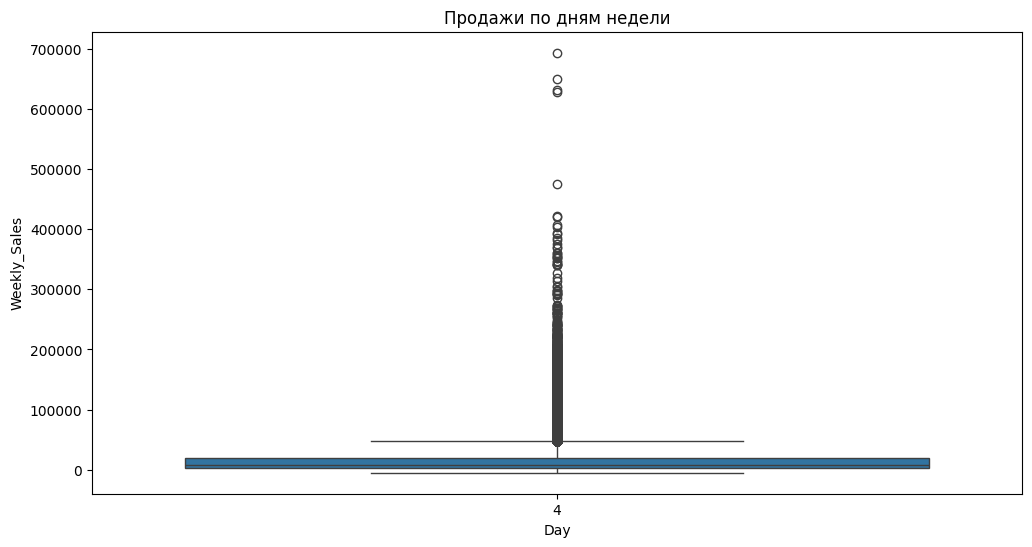

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

# Преобразование даты
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

# Объединение данных
train = train.merge(stores, on='Store', how='left')
train = train.merge(features, on=['Store', 'Date'], how='left')

# Проверим пропущенные значения
print("\nMissing values:")
print(train.isnull().sum())

# Создание новых признаков
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week
train['Day'] = train['Date'].dt.dayofweek
train['IsHoliday'] = train['IsHoliday_x'].astype(int)

# Визуализируем продажи во времени
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='Date', y='Weekly_Sales', ci=None)
plt.xticks(rotation=45)
plt.title('Продажи Walmart во времени')
plt.show()

# Анализ сезонности
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Weekly_Sales', data=train)
plt.title('Сезонность продаж по месяцам')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='Weekly_Sales', data=train)
plt.title('Продажи по дням недели')
plt.show()
